<h1 style="text-align:center; color:Purple"><u><b>Sensors and Dataloggers Response/ Bode Plots</b></u></h1><br><br>

Here I'm using Obspy to generate bode plots for different sensors and dataloggers using the DMC nominal response files. Alternatively, if one needs, can input the poles and zeros to generate the response/ bode plots. <br><br>
<b>Sensors: CMG-3T, Titan accelerometer, and STS-2 <br>
Dataloggers: Q330, Centaur, and RT-130 <br></b><br>
Please download the nominal response files you need from this link to your working folder: http://ds.iris.edu/NRL/ <br>
At the end of the execution of the follwing codes, I am saving the plots in .png format into your working folder.<br><br>
<u>References</u>
1. https://docs.obspy.org/master/tutorial/code_snippets/seismometer_correction_simulation.html?highlight=seed%20resp <br>
2. https://docs.obspy.org/packages/autogen/obspy.core.inventory.response.Response.plot.html <br>
3. https://docs.obspy.org/tutorial/code_snippets/frequency_response.html <br>
 

<br><br>
<I>2020/08/30 <br>
by Saminda Nirmal Fonseka<br>
IRIS/PASSCAL instrument center</I><br><br>

============================================================================================================<br><br>

<h2 style="text-align:center;color:Blue"> 1. Bode Plots for Sensors</h2><br><br>

<br>
<h3 style="text-align:center;color:orange">Using DMC Nominal Response Files <br>

<I> Download the  sensors or dataloggers transfer function from DMC, you can insert it into the following code and generate bode plots </I></h3>
<br><br><br>

<h3 style="text-align:center">A: CMG-3T </h3><br>
<h3>120s/ 1500V/M/S</h3>
    
Link: http://ds.iris.edu/NRL/sensors/guralp/guralp_cmg3t_sensors.html <br>
File: http://ds.iris.edu/NRL/sensors/guralp/RESP.XX.NS007..BHZ.CMG3T.120.1500

In [1]:
# Loadding necessary tools

import obspy
from obspy import read
import matplotlib.pyplot as plt
from obspy import read_inventory
from obspy.signal.invsim import paz_to_freq_resp
import numpy as np

Load the resp file and plot it.

<I><B>Response.plot(min_freq, output='VEL', start_stage=None, end_stage=None, label=None, axes=None, sampling_rate=None, unwrap_phase=False, plot_degrees=False, show=True, outfile=None)</B>

minimum frequency = 0.0001<br>
Output units: "DISP" for displacement / "VEL" for velocity / "ACC" for acceleration  <br>
sample rate = 5000Hz<br>
unwrap_phase = can wrap or unwrap the phase<br>
outfile = save the plot<br></I>



Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 1500 defined at 1.000 Hz
	2 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1


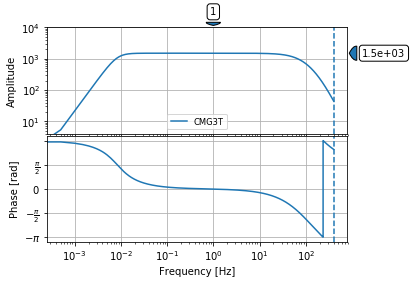

In [2]:
inv = read_inventory("RESP.XX.NS007..BHZ.CMG3T.120.1500.txt")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="VEL", start_stage=1, end_stage=2, sampling_rate=5000, unwrap_phase=True)

bode_plot = resp.plot(0.0005, output="VEL", sampling_rate=800,
         unwrap_phase=False, label='CMG3T')
bode_plot.savefig("RESP.XX.NS007..BHZ.CMG3T.120.1500.png",dpi = 300)

<br><br><br><br><br>
<h3 style="text-align:center;color:orange">Alternative Method: Using Poles and Zeros <br>

<I>If you have the sensor's or datalogger's transfer function in poles and zeros format, you can insert it into the following code and generate bode plots </I></h3>
<br>

<I><b> paz_to_freq_resp(poles, zeros, scale_fac, t_samp, nfft, freq=False)</b>

Convert Poles and Zeros (PAZ) to frequency response.

The output contains the frequency zero which is the offset of the trace.
Parameters:	

1. poles (list of complex) The poles of the transfer function
2. zeros (list of complex) The zeros of the transfer function
3. scale_fac (float) Gain factor
4. t_samp (float) Sampling interval in seconds
5. nfft (int) Number of FFT points of signal which needs correction </I>

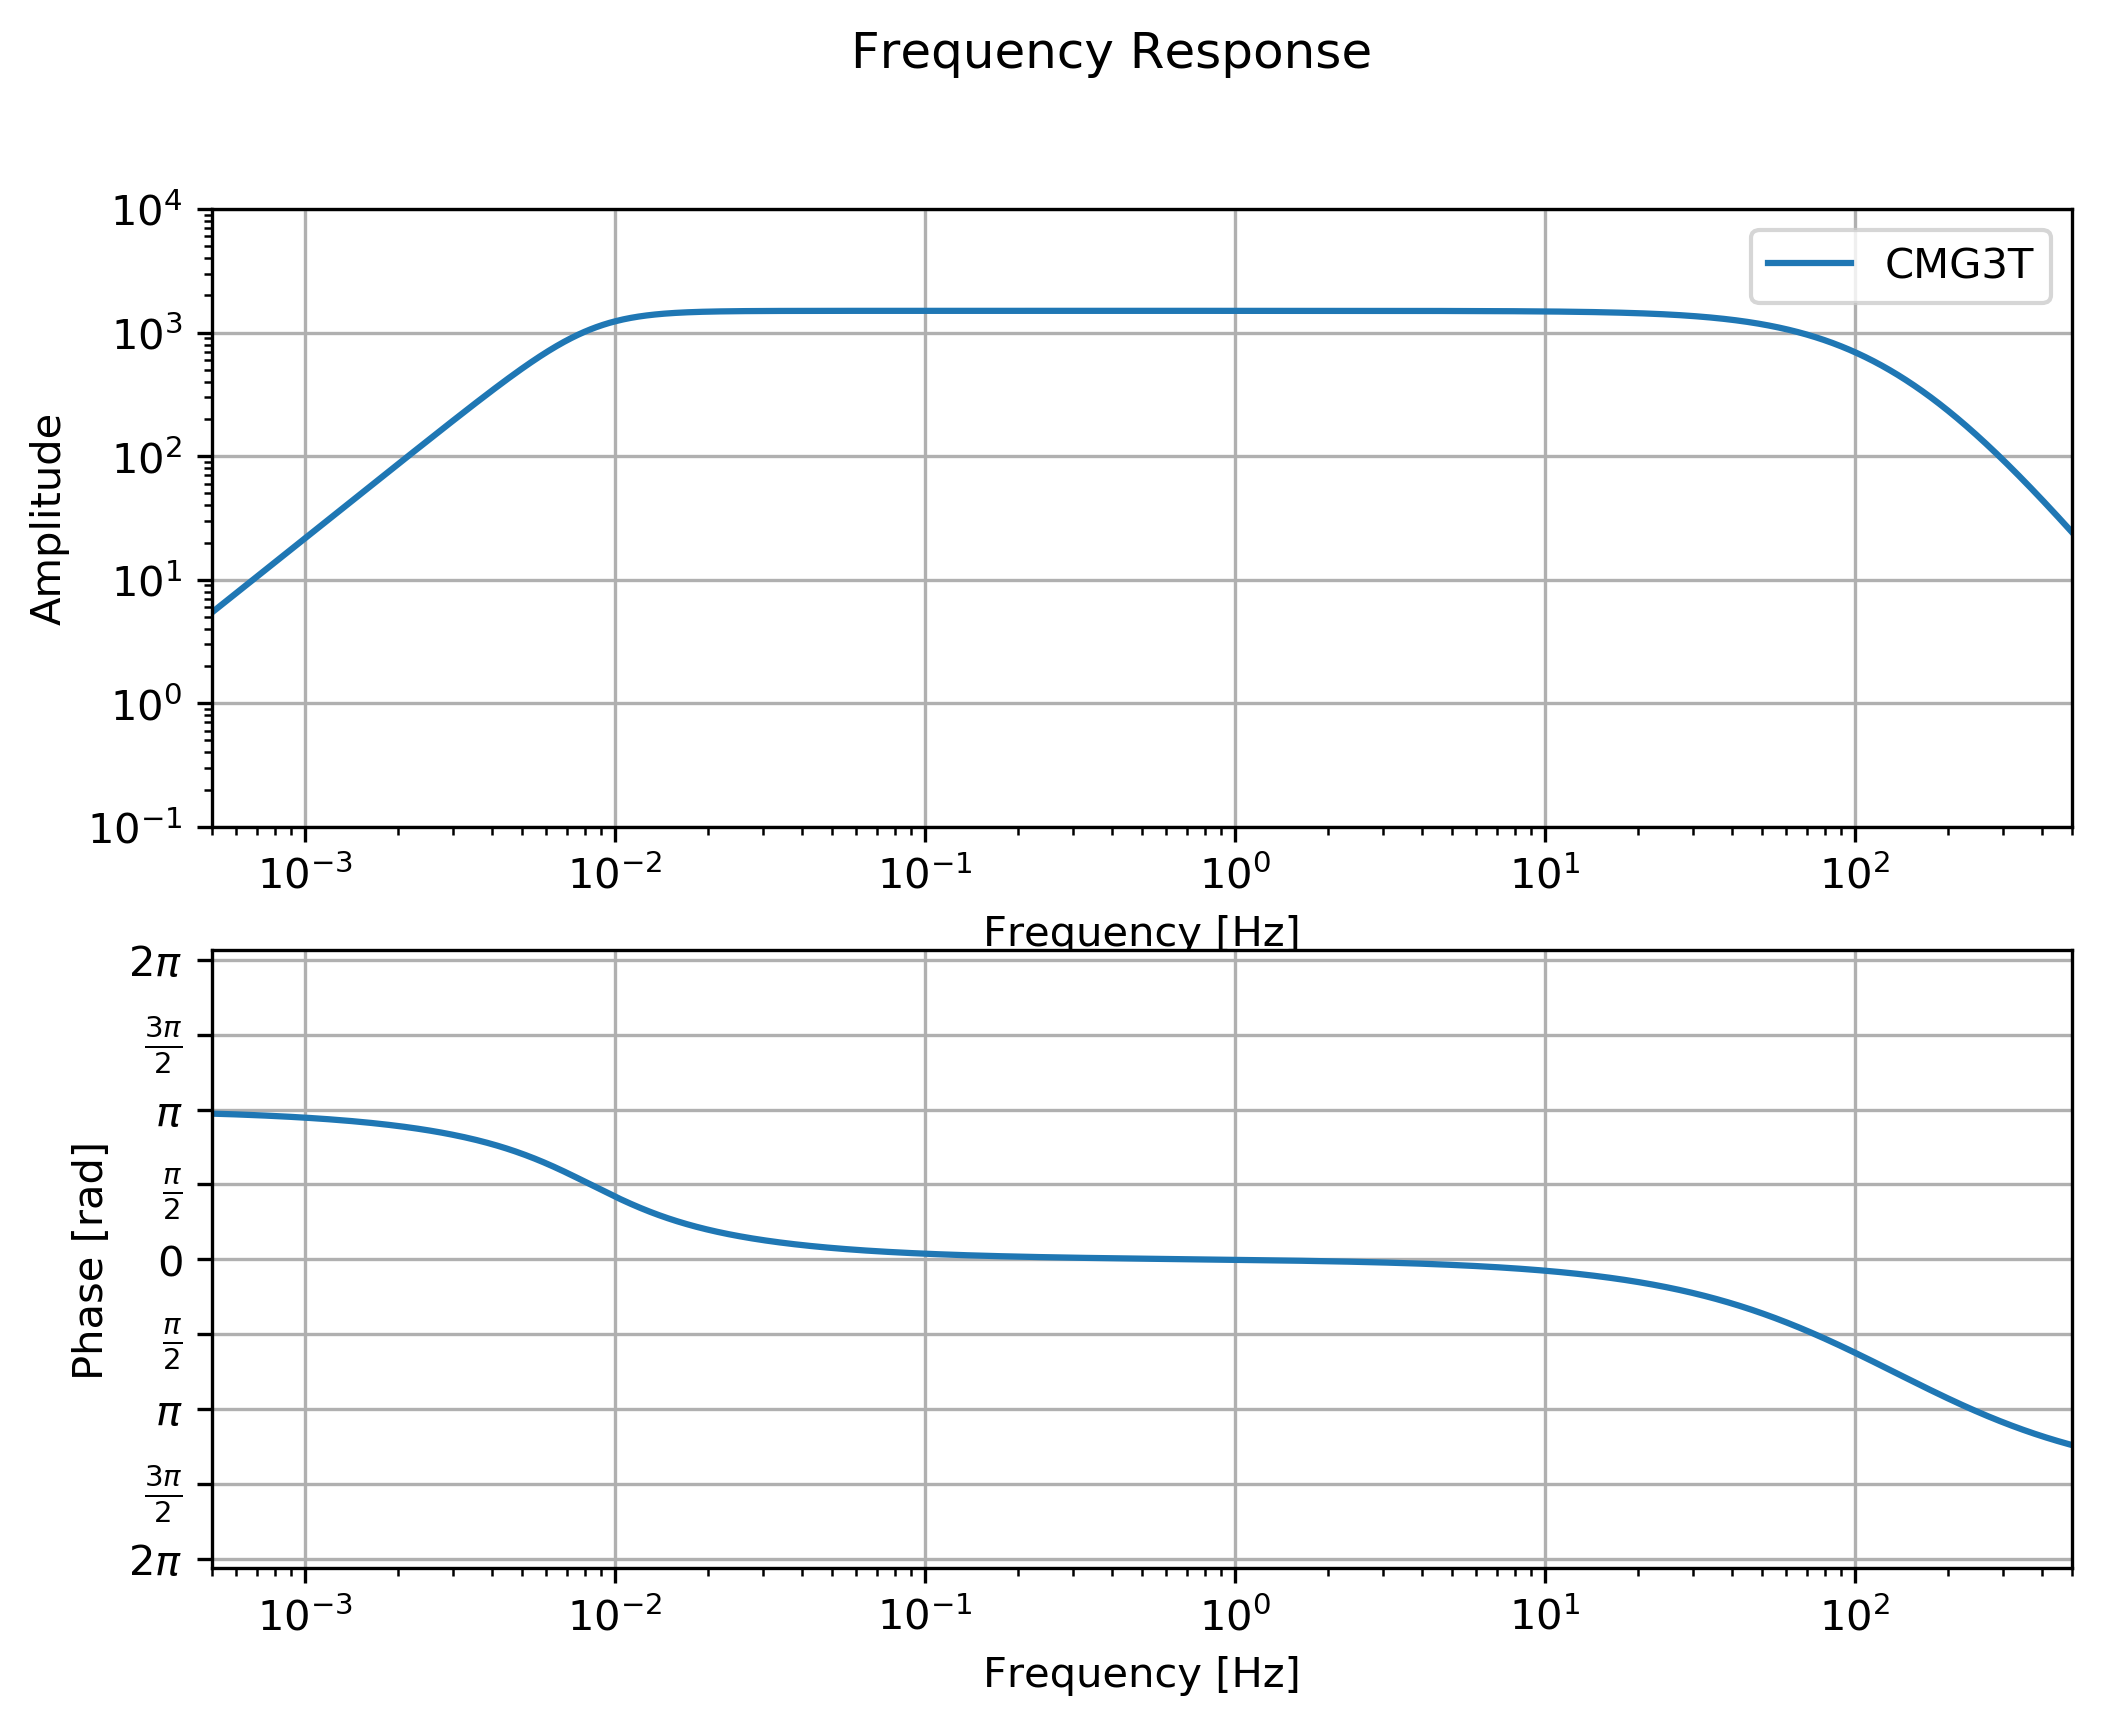

In [3]:
# insert the device ploes, zeros, and gain information here
#Eg: CMG3T

poles            = [-3.700800E-02+3.700800E-02j, -3.700800E-02-3.700800E-02j, -5.026500E+02+0j, 
                   -1.005000E+03+0j, -1.131000E+03+0j]
zeros            = [0+0j, 0+0j]
gain             = 5.71508E+08
sensitivity      = 1.500000E+03
sample_interval  = 0.0001
nfft             = 65536*1024*2
freq             = True # False

h, f = paz_to_freq_resp(poles, zeros, gain*sensitivity, sample_interval, nfft, freq)

plt.figure(figsize=(8, 6), dpi=300)
plt.subplot(211)
plt.loglog(f, abs(h))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(5*10**-4, 5*10**2)
plt.ylim(10**-1, 10**4)
plt.grid()
plt.legend(['CMG3T'])

plt.subplot(212)
phase = np.unwrap(np.angle(h))
plt.semilogx(f, phase)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Phase [rad]')
plt.xlim(5*10**-4, 5*10**2)
plt.grid()

plt.yticks(
    [0, np.pi / 2, np.pi, 3 * np.pi / 2, 2 * np.pi,  -np.pi / 2, -np.pi, -3 * np.pi / 2, -2 * np.pi],
    ['$0$', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$',   
     r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.ylim(-2*np.pi - 0.2, 2*np.pi + 0.2)

plt.suptitle('Frequency Response')
plt.subplots_adjust(wspace=0.3)
# plt.show()

plt.savefig("RESP.poles.zeros.png")

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br><br>

<h3 style="text-align:center">B: Nanometrics Titan Accelerometer </h3>
<h3>Titan 0-0.002s / 1.02 V/M/S**2</h3>

Link: http://ds.iris.edu/NRL/sensors/nanometrics/nanometrics_titan_sensors.htm <br>
File: http://ds.iris.edu/NRL/sensors/nanometrics/RESP.XX.NS128..BNZ.Titan.DC_430.20V.2G

Channel Response
	From M/S**2 (Acceleration in Meters Per Second Per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 1.02 defined at 1.000 Hz
	2 stages:
		Stage 1: PolesZerosResponseStage from M/S**2 to V, gain: 1.02
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1


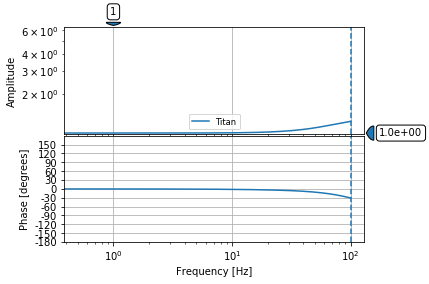

In [4]:
inv = read_inventory("RESP.XX.NS128..BNZ.Titan.DC_430.20V.2G.txt")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="ACC", start_stage=1, end_stage=2, sampling_rate=20000, unwrap_phase=True)

bode_plot = resp.plot(0.5, output="ACC", sampling_rate=200,
         unwrap_phase=True, plot_degrees=True, label='Titan')

bode_plot.savefig("RESP.XX.NS128..BNZ.Titan.DC_430.20V.2G.png", dpi = 300)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br><br>

<h3 style="text-align:center">C: Streckeisen, STS-2, generation 3 </h3>
<h3>120 s to 0.00833 Hz	/ 1500 V/M/S</h3>

Link: http://ds.iris.edu/NRL/sensors/streckeisen/streckeisen_sts2_sensors.htm <br>
File: http://ds.iris.edu/NRL/sensors/streckeisen/RESP.XX.NS085..BHZ.STS2_gen3.120.1500

Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 1500 defined at 1.000 Hz
	2 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1500
		Stage 2: CoefficientsTypeResponseStage from V to COUNTS, gain: 1


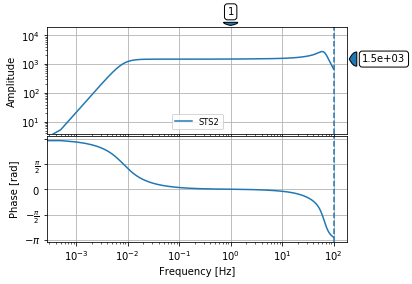

In [5]:
inv = read_inventory("RESP.XX.NS085..BHZ.STS2_gen3.120.1500.txt")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="VEL", start_stage=1, end_stage=2, sampling_rate=5000, unwrap_phase=True)

bode_plot = resp.plot(0.0005, output="VEL", sampling_rate=200,
         unwrap_phase=True, label='STS2')

bode_plot.savefig("RESP.XX.NS085..BHZ.STS2_gen3.120.1500.png", dpi = 300)

<br><br>============================================================================================================<br><br>

<h2 style="text-align:center;color:Blue"> 2. Bode Plots for Dataloggers</h2><br><br><br>

<h3 style="text-align:center">A: Q330 </h3><br>
<h3>Quanterra / Q330SR / 1 / 200Hz / Linear Filters all rates</h3>


Link: http://ds.iris.edu/NRL/dataloggers/quanterra/quanterra_Q330SR_dataloggers.htm <br>
File: http://ds.iris.edu/NRL/dataloggers/quanterra/RESP.XX.NQ007..HHZ.Q330.SR.1.200.all


Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 419430 defined at 0.050 Hz
	4 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1
		Stage 2: ResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 419430
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


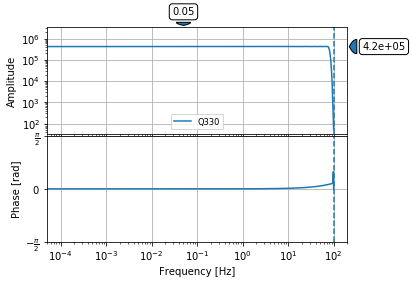

In [6]:
inv = read_inventory("RESP.XX.NQ007..HHZ.Q330.SR.1.200.all")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="VEL", start_stage=1, end_stage=2, sampling_rate=5000, unwrap_phase=True)

bode_plot = resp.plot(0.0001, output="VEL", sampling_rate=200,
          unwrap_phase=True, label='Q330')

bode_plot.savefig("RESP.XX.NQ007..HHZ.Q330.SR.1.200.all.png", dpi = 300)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br><br>

<h3 style="text-align:center">B: Centaur </h3><br>
<h3>Nanometrics	Centaur	40Vpp / gain = 1 / 200Hz / IIR = Off / FIR = Linear </h3>

Link: http://ds.iris.edu/NRL/dataloggers/nanometrics/centaur/nanometrics_centaur_dataloggers.htm <br>
File: http://ds.iris.edu/NRL/dataloggers/nanometrics/centaur/RESP.XX.NN429..HHZ.CENTAUR.1.200.OFF.LP

Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 400000 defined at 1.000 Hz
	6 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1
		Stage 2: PolesZerosResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 400000
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


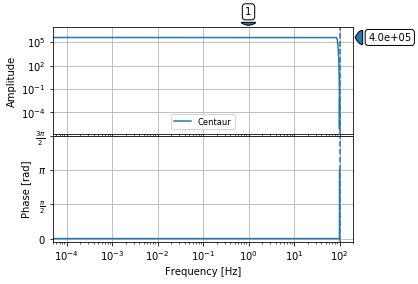

In [7]:
inv = read_inventory("RESP.XX.NN429..HHZ.CENTAUR.1.200.OFF.LP")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="VEL", start_stage=1, end_stage=2, sampling_rate=5000, unwrap_phase=True)

bode_plot = resp.plot(0.0001, output="VEL", sampling_rate=200,
          unwrap_phase=True, label='Centaur')

bode_plot.savefig("RESP.XX.NN429..HHZ.CENTAUR.1.200.OFF.LP.png", dpi = 300)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br><br>

<h3 style="text-align:center">C: RT130 </h3><br>
<h3>REF TEK / 130-01 / gain = 1 / 200 Hz </h3>

Link: http://ds.iris.edu/NRL/dataloggers/reftek/reftek_130_dataloggers.html#130-01 <br>
File: http://ds.iris.edu/NRL/dataloggers/reftek/RESP.XX.NR010..HHZ.130.1.200

Channel Response
	From M/S (Velocity in Meters per Second) to COUNTS (Digital Counts)
	Overall Sensitivity: 629129 defined at 0.050 Hz
	10 stages:
		Stage 1: PolesZerosResponseStage from M/S to V, gain: 1
		Stage 2: ResponseStage from V to V, gain: 1
		Stage 3: CoefficientsTypeResponseStage from V to COUNTS, gain: 629129
		Stage 4: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 5: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 6: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 7: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 8: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 9: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1
		Stage 10: CoefficientsTypeResponseStage from COUNTS to COUNTS, gain: 1


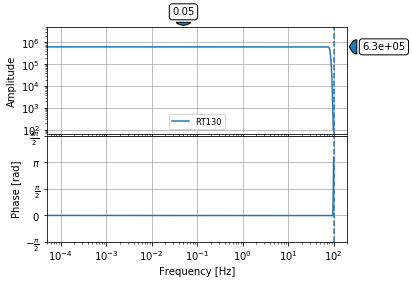

In [8]:
inv = read_inventory("RESP.XX.NR010..HHZ.130.1.200")
# print(inv)
resp = inv[0][0][0].response
print(resp)
# resp.plot(0.0001, output="VEL", start_stage=1, end_stage=2, sampling_rate=5000, unwrap_phase=True)

bode_plot = resp.plot(0.0001, output="VEL", sampling_rate=200,
          unwrap_phase=True, label='RT130')

bode_plot.savefig("RESP.XX.NR010..HHZ.130.1.200.png", dpi = 300)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------<br><br>